<a href="https://colab.research.google.com/github/Bhuvika-Agrawal/ML-Week-2-Assignment/blob/main/ml_Week_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Uploading datasets from local storage
from google.colab import files


uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [5]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [16]:
titanic_df = pd.read_csv("Titanic-Dataset.csv")

# Data Preprocessing for Titanic Dataset
titanic_df = titanic_df[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()
titanic_df["Sex"] = LabelEncoder().fit_transform(titanic_df["Sex"])  # Convert categorical to numeric

In [17]:
# Splitting into features and target
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Predictions
y_pred = model.predict(X_test)

In [22]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        87
           1       0.67      0.68      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143



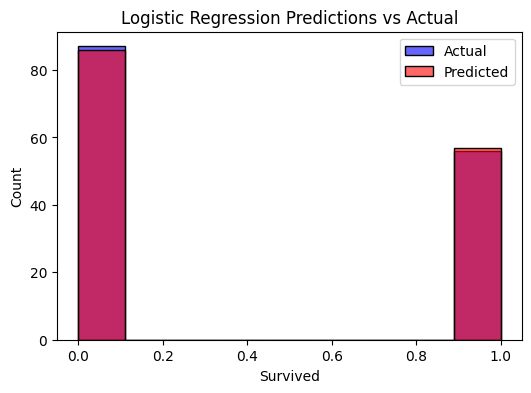

In [23]:
# Visualization
plt.figure(figsize=(6, 4))
sns.histplot(y_test, label="Actual", color="blue", alpha=0.6)
sns.histplot(y_pred, label="Predicted", color="red", alpha=0.6)
plt.legend()
plt.title("Logistic Regression Predictions vs Actual")
plt.show()

In [24]:
mall_df = pd.read_csv("Mall_Customers.csv")

In [25]:
# Selecting relevant features for clustering
X_mall = mall_df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [26]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
mall_df["Cluster"] = kmeans.fit_predict(X_mall)

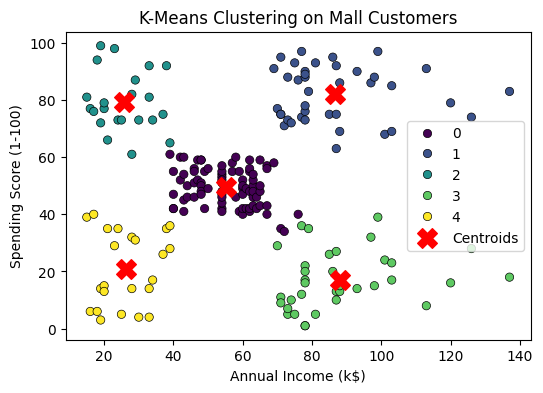

In [27]:
# Visualizing the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=mall_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="viridis", edgecolor="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.title("K-Means Clustering on Mall Customers")
plt.legend()
plt.show()